In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
from TSP import compute_distance_matrix, visualize
from GA import solve

In [2]:
def analyze_ga(
    csv_file: str,
    population_size: int = 100,
    generations: int = 200,
    mutation_rate: float = 0.01,
    mutation_algorithm: str = 'swap',
    crossover_algorithm: str = 'single_point',
    selection_algorithm: str = 'tournament',
    show_fitness_plot: bool = True,
    show_route_plot: bool = True
) -> dict:
    """
    Run GA on a CSV of city coordinates and display results.
    Returns a dict with best_distance, best_route, fitness_history, time_sec.
    """
    # Load locations
    df = pd.read_csv(csv_file)
    if 'lat' in df.columns and 'lon' in df.columns:
        locations = list(zip(df['lat'], df['lon']))
    else:
        arr = df.values
        locations = [(float(r[1]), float(r[2])) for r in arr[1:]]

    # Compute distance matrix
    dist_mat = compute_distance_matrix(locations)

    # Run GA
    t0 = time.time()
    best_distance, best_route, fitness_history = solve(
        dist_mat,
        population_size=population_size,
        generations=generations,
        mutation_rate=mutation_rate,
        mutation_algorithm=mutation_algorithm,
        crossover_algorithm=crossover_algorithm,
        selection_algorithm=selection_algorithm
    )
    elapsed = time.time() - t0

    # Print results
    print(f"\n--- RESULTS for {csv_file} ---")
    print(f"Best route : {best_route}")
    print(f"Total dist : {best_distance:.2f} km")
    print(f"Time elapsed: {elapsed:.2f} s")

    # Plot fitness curve
    if show_fitness_plot:
        # plt.figure(figsize=(6,4))
        # plt.plot(fitness_history, marker='o', linestyle='-')
        # plt.title(f"Fitness over generations (population_size={population_size}, generations={generations})")
        # plt.xlabel("Generation")
        # plt.ylabel("Best fitness")
        # plt.grid(True)
        # plt.show()

        plt.figure(figsize=(8, 5))
        plt.plot(fitness_history, marker=None, linestyle='-')
        plt.title('Fitness over generations')
        plt.xlabel('Generation')
        plt.ylabel('Fitness')
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot route
    # if show_route_plot:
    #     visualize(locations, [c-1 for c in best_route], title=f"Route for {csv_file}")

    # Return dict
    return {
        'best_distance':     best_distance,
        'best_route':        best_route,
        'fitness_history':   fitness_history,
        'time_sec':          elapsed
    }


# MẶC ĐỊNH
- THUẬT TOÁN
    - SELECTION = TOURNAMENT
    - CROSSOVER = SINGLE POINT
    - MUTATION = SWAP
- THAM SỐ
    - POPULATION SIZE = 100
    - GENERATIONS = 200
    - MUTATION RATE = 0.01

## TRƯỜNG HỢP 1: NHÓM NHỎ (3-6 THÀNH PHỐ)

1. Bộ ThreeProvinces.csv (3 thành phố)


--- RESULTS for ../data/1_ThreeProvinces.csv ---
Best route : [1, 2, 3, 1]
Total dist : 209.51 km
Time elapsed: 0.13 s


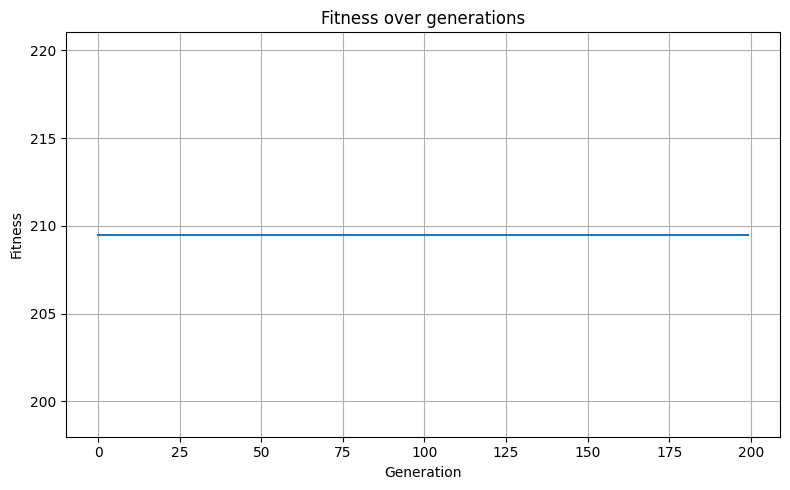

In [ ]:
resultN1 = analyze_ga(
    "../data/1_ThreeProvinces.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


2. SouthEast.csv (6 thành phố)


--- RESULTS for ../data/2_SouthEast.csv ---
Best route : [1, 6, 5, 3, 2, 4, 1]
Total dist : 426.02 km
Time elapsed: 0.20 s


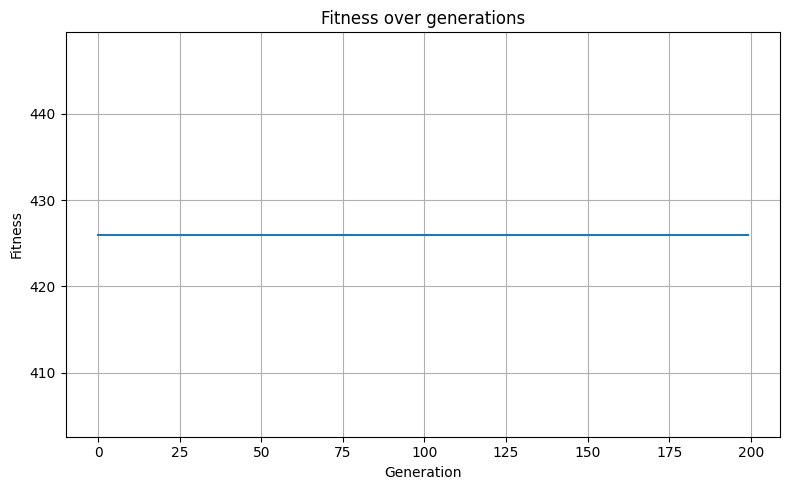

In [16]:
resulN2 = analyze_ga(
    "../data/2_SouthEast.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)


**Kết luận:** Với bộ dữ liệu nhóm nhỏ có sự hội tụ nhanh ở các thể hệ đầu, vì thế chỉ cần dùng các thông số mặc định để tìm ra lời giải tối ưu.

## TRƯỜNG HỢP 2: NHÓM TRUNG BÌNH (13-19 THÀNH PHỐ)

1. MekongDelta.csv (13 thành phố)


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 10, 4, 3, 2, 5, 6, 8, 7, 11, 12, 13, 9, 1]
Total dist : 699.20 km
Time elapsed: 0.28 s


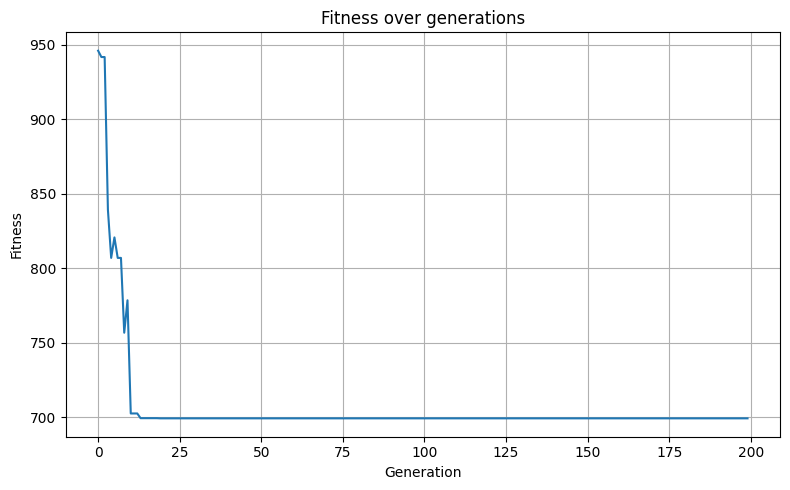

In [24]:
resultT1= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=100,
    generations=200,
    mutation_rate=0.01
)

        Điều chỉnh tham số của thuật toán


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 7, 11, 8, 6, 5, 2, 3, 4, 10, 13, 12, 9, 1]
Total dist : 668.76 km
Time elapsed: 1.04 s


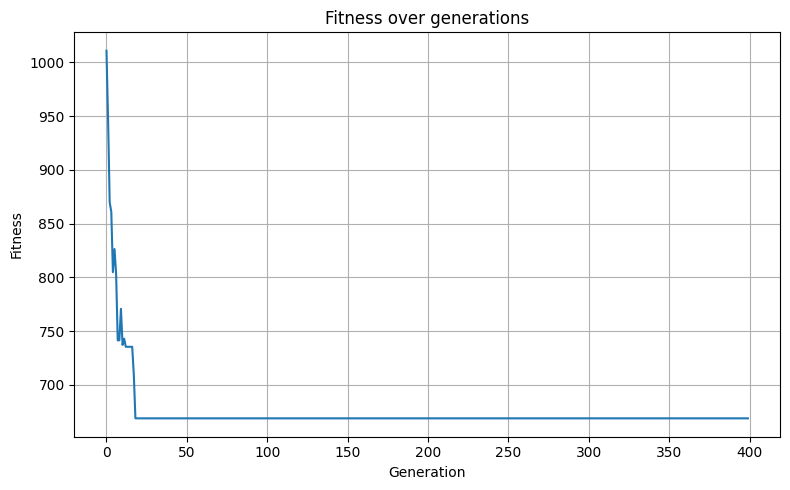

In [32]:
resultT11= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=200,
    generations=400,
    mutation_rate=0.05
)

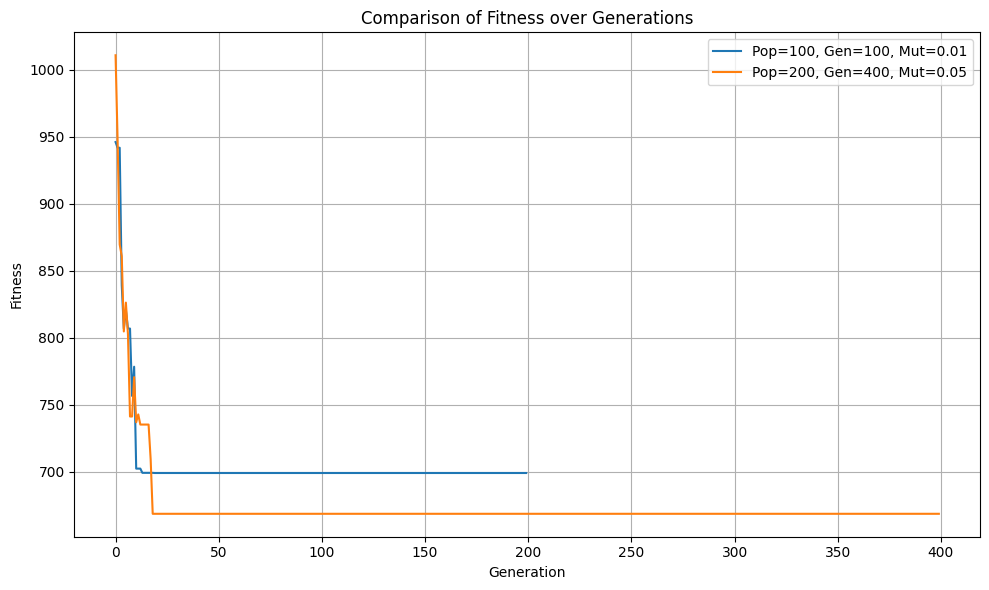

In [33]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(resultT1['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(resultT11['fitness_history'], label='Pop=200, Gen=400, Mut=0.05')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Fitness giảm nhanh hơn so với lần trước, bắt đầu từ giá trị cao khoảng 1000 và giảm xuống khoảng 670 nhanh chóng trong vài chục thế hệ đầu.
- Sau đó, fitness giữ ổn định không cải thiện thêm qua các thế hệ còn lại.
- So với đồ thị trước, tốc độ giảm fitness có phần cải thiện, chứng tỏ thuật toán có sự đa dạng và khám phá tốt hơn nhờ tham số mutation rate và population size được tăng lên.
- Tuy nhiên, vẫn tồn tại hiện tượng hội tụ sớm ở một mức fitness không thấp hơn nữa, tức thuật toán có thể vẫn bị kẹt ở cực trị cục bộ.

    Điều chỉnh thuật toán


--- RESULTS for ../data/3_MekongDelta.csv ---
Best route : [1, 7, 8, 6, 5, 2, 3, 4, 10, 13, 12, 11, 9, 1]
Total dist : 650.14 km
Time elapsed: 1.46 s


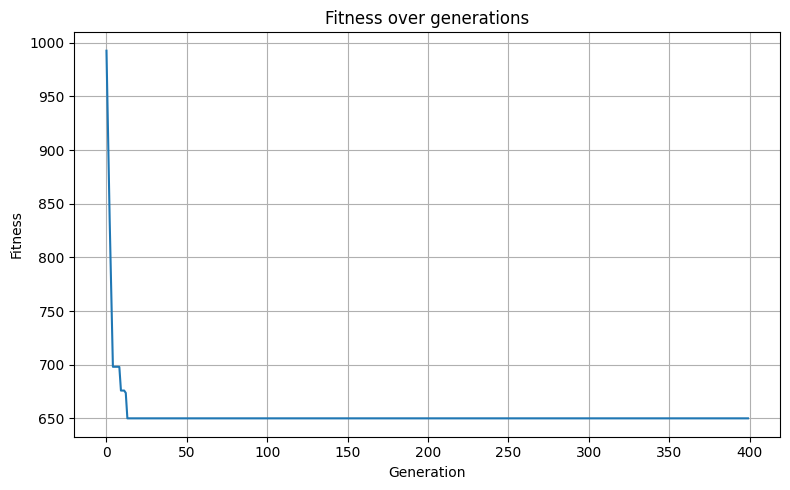

In [37]:
resultT111= analyze_ga(
    "../data/3_MekongDelta.csv",
    population_size=200,
    generations=400,
    mutation_rate=0.05,
    selection_algorithm='rank'
)

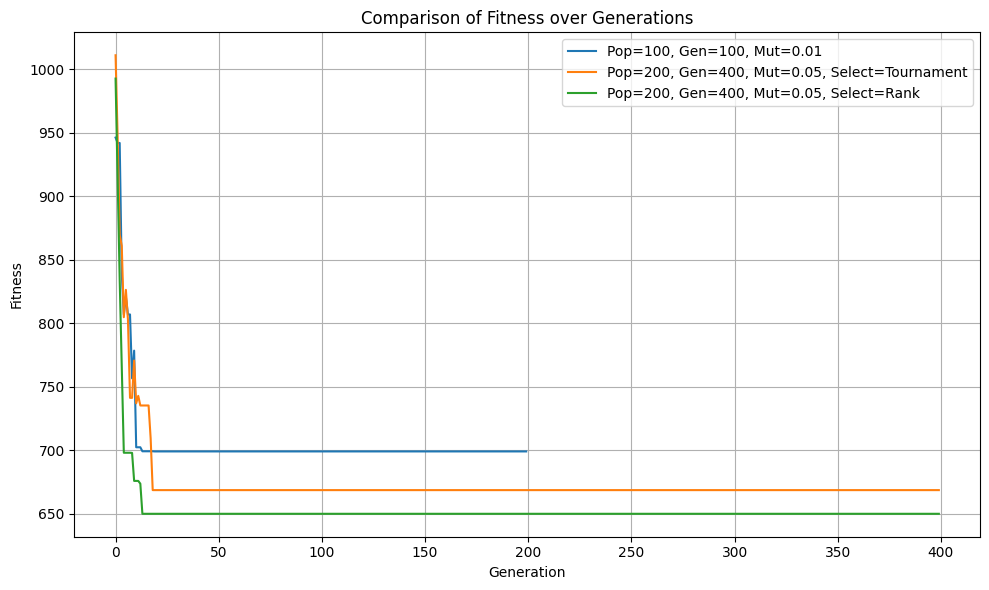

In [39]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result2
plt.plot(resultT1['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')
plt.plot(resultT11['fitness_history'], label='Pop=200, Gen=400, Mut=0.05, Select=Tournament')
plt.plot(resultT111['fitness_history'], label='Pop=200, Gen=400, Mut=0.05, Select=Rank')


plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Nhận xét:** Việc thay đổi phương pháp selection sang Rank Selection đã cải thiện đáng kể chất lượng hội tụ so với Tournament Selection trong bài toán này, giúp thuật toán tìm được lời giải tốt hơn với độ ổn định cao hơn.

**19 THÀNH PHỐ**


--- RESULTS for ../data/4_SouthRegion.csv ---
Best route : [1, 2, 5, 4, 8, 7, 9, 10, 16, 12, 15, 17, 14, 13, 11, 6, 3, 1]
Total dist : 1057.21 km
Time elapsed: 0.16 s


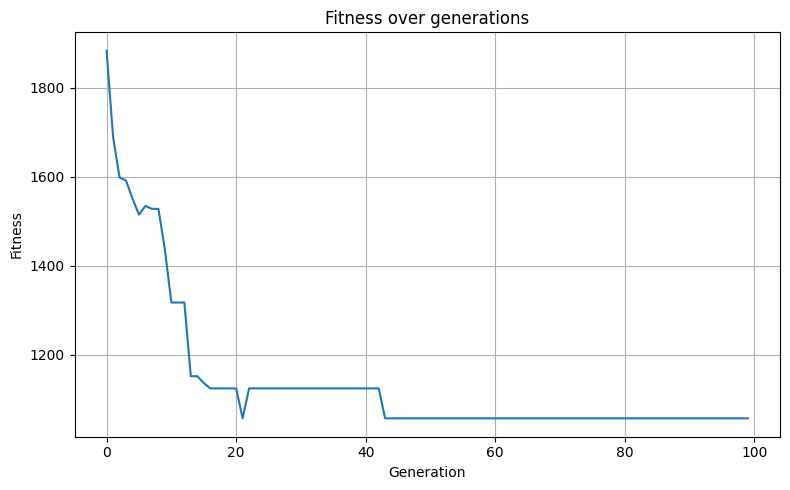

In [6]:
result3 = analyze_ga(
    "../data/4_SouthRegion.csv",
    population_size=100,
    generations=100,
    mutation_rate=0.01
)


--- RESULTS for ../data/4_SouthRegion.csv ---
Best route : [1, 3, 2, 5, 4, 8, 10, 9, 7, 6, 11, 13, 14, 17, 15, 16, 12, 1]
Total dist : 1188.35 km
Time elapsed: 3.10 s


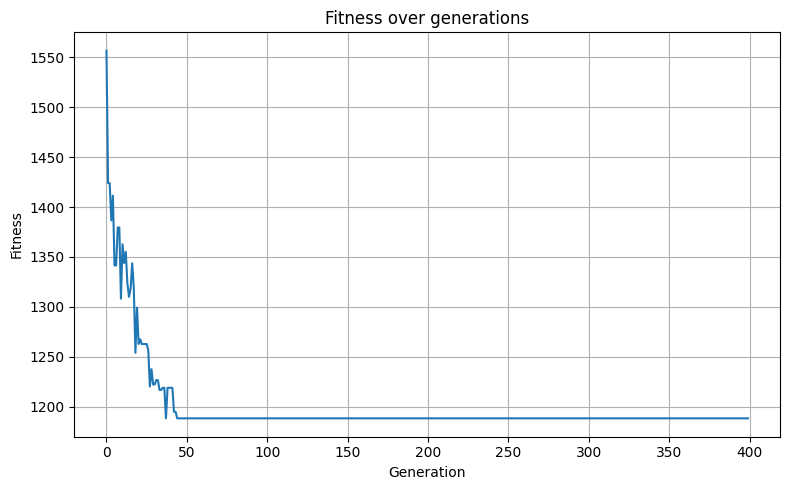

In [7]:
result4 = analyze_ga(
    "../data/4_SouthRegion.csv",
    population_size=400,
    generations=400,
    mutation_rate=0.03
)

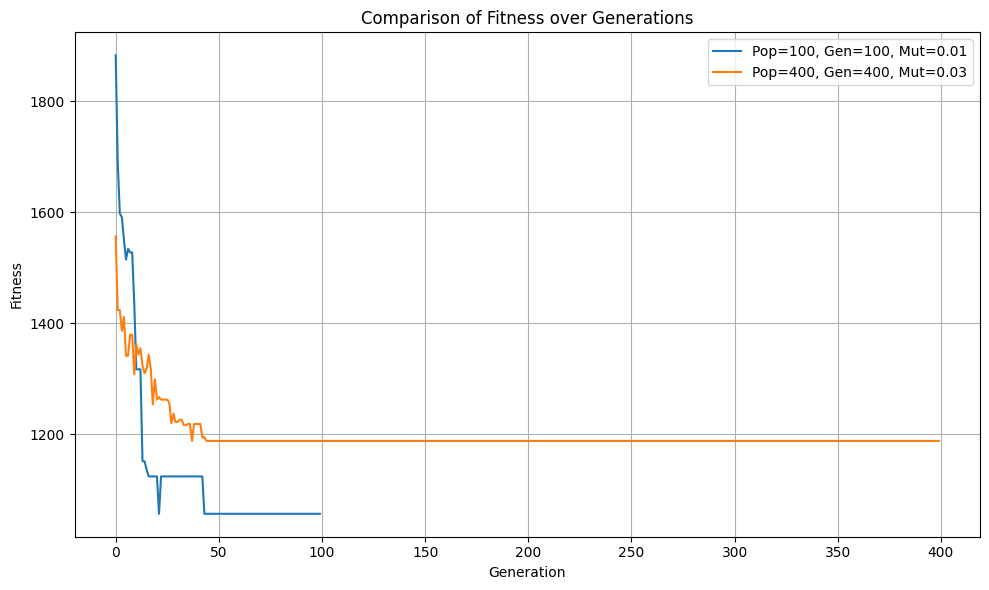

In [8]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(result3['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(result4['fitness_history'], label='Pop=400, Gen=400, Mut=0.03')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Bộ tham số mới cho ra hàm fitness tốt hơn đáng kể ở cả 2 bộ dữ liệu có kích thước nhỏ (13 thành phố và 19 thành phố)

TRƯỜNG HỢP 2: DỮ LIỆU KÍCH THƯỚC LỚN

1. 25 thành phố


--- RESULTS for ../data/6_NorthRegion.csv ---
Best route : [1, 5, 6, 25, 16, 21, 24, 22, 23, 17, 19, 4, 2, 3, 12, 14, 7, 18, 8, 9, 20, 15, 13, 11, 10, 1]
Total dist : 1998.06 km
Time elapsed: 0.22 s


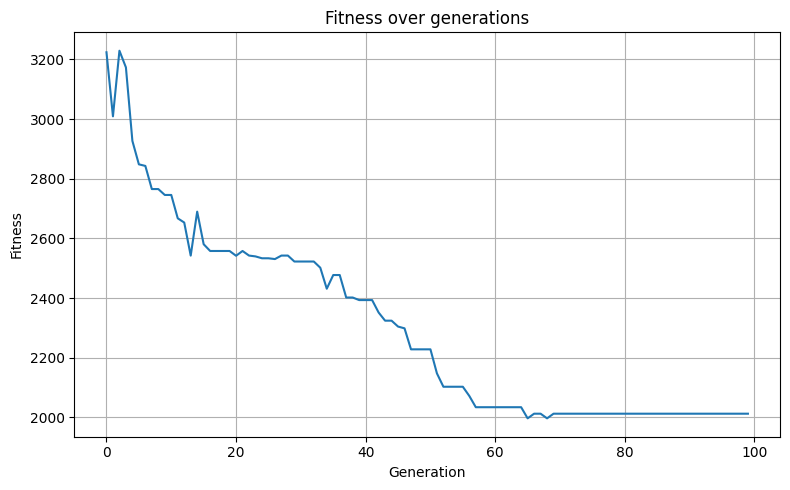

In [9]:
result5 = analyze_ga(
    "../data/6_NorthRegion.csv",
    population_size=100,
    generations=100,
    mutation_rate=0.01
)

Đường fitness biến động nhiều với các bộ dữ liệu có kích thước. Sau nhiều lần chạy kết quả, không thể kết luận chắc chắn rằng khi tăng các tham số lên sẽ dẫn đến kết quả tốt hơn (thông thường đường fitness sau khi tăng tham số sẽ biến động nhiều hơn dẫn đến hội tụ không ổn định)


--- RESULTS for ../data/6_NorthRegion.csv ---
Best route : [1, 5, 3, 6, 25, 12, 10, 11, 13, 14, 7, 15, 16, 18, 8, 19, 21, 17, 23, 22, 24, 20, 9, 4, 2, 1]
Total dist : 1654.95 km
Time elapsed: 0.99 s


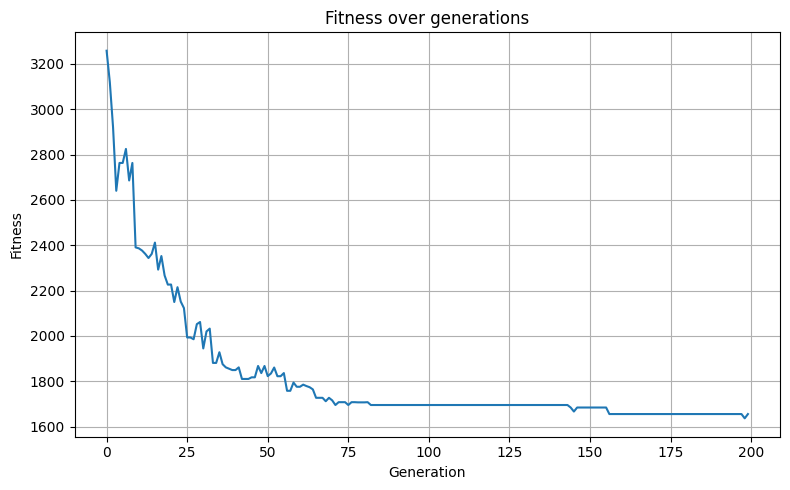

In [10]:
result6 = analyze_ga(
    "../data/6_NorthRegion.csv",
    population_size=200,
    generations=200,
    mutation_rate=0.03
)

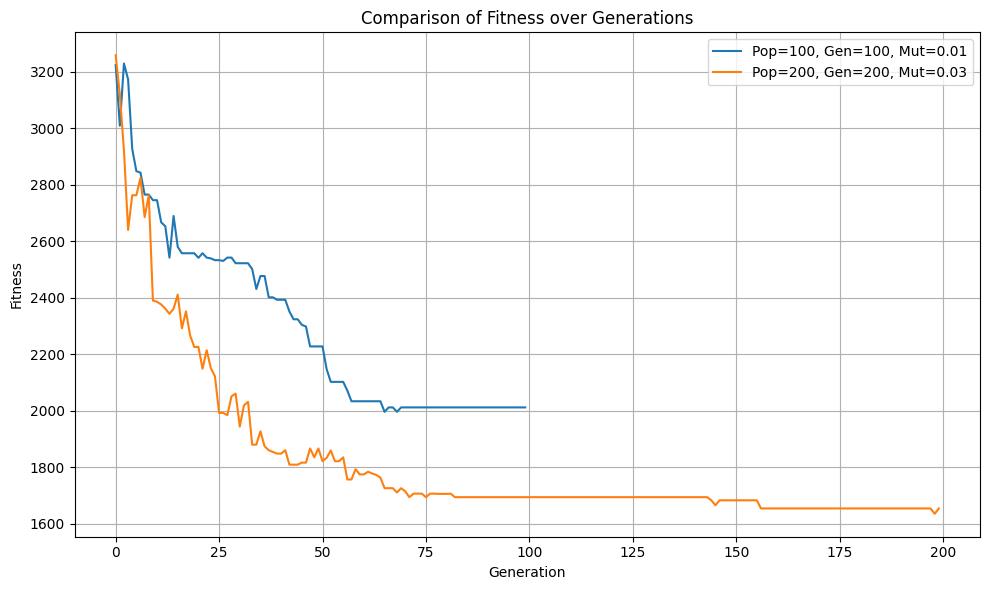

In [11]:
plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(result5['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(result6['fitness_history'], label='Pop=200, Gen=200, Mut=0.03')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

2. 38 thành phố


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 8, 10, 11, 12, 24, 37, 13, 18, 17, 15, 21, 23, 29, 27, 35, 31, 34, 36, 38, 28, 33, 30, 32, 25, 26, 20, 22, 16, 9, 14, 7, 19, 1]
Total dist : 4567.87 km
Time elapsed: 0.46 s


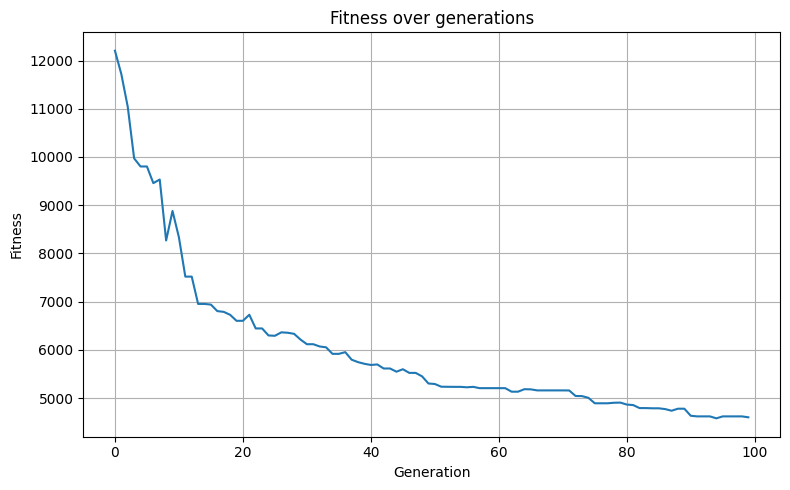

In [12]:
result7 = analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=100,
    generations=100,
    mutation_rate=0.01
)


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 7, 8, 14, 15, 9, 10, 11, 16, 17, 13, 12, 18, 24, 21, 22, 20, 26, 28, 25, 37, 23, 30, 35, 34, 36, 38, 32, 27, 29, 31, 33, 1]
Total dist : 4443.95 km
Time elapsed: 5.54 s


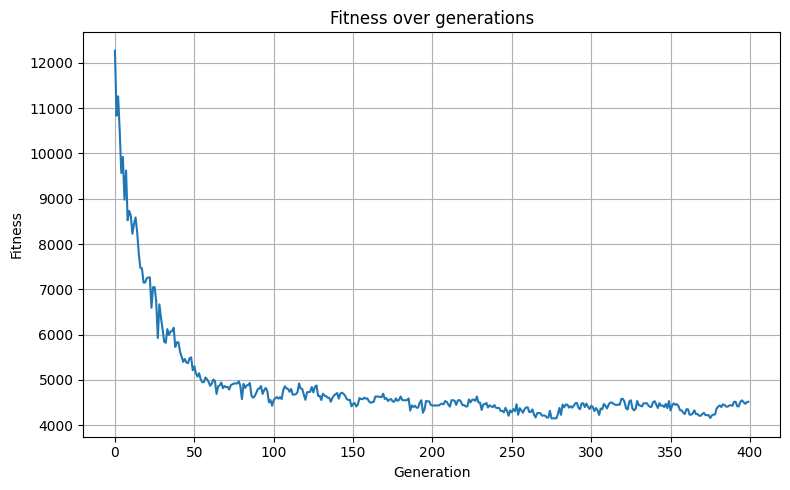

In [13]:
result8 = analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=400,
    generations=400,
    mutation_rate=0.03
)

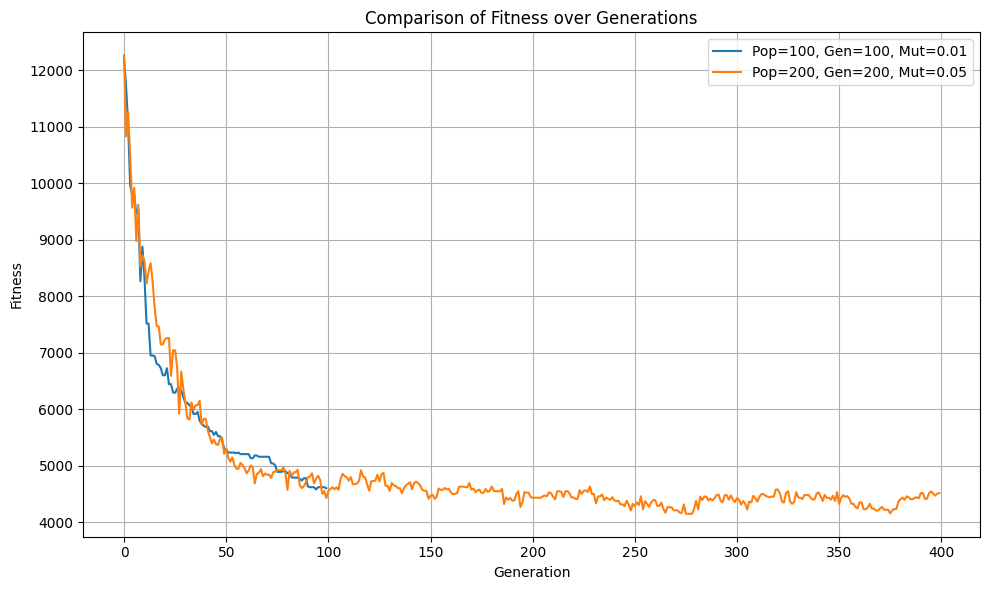

In [14]:

plt.figure(figsize=(10,6))

# Vẽ fitness của result1
plt.plot(result7['fitness_history'], label='Pop=100, Gen=100, Mut=0.01')

# Vẽ fitness của result2
plt.plot(result8['fitness_history'], label='Pop=200, Gen=200, Mut=0.05')

plt.title('Comparison of Fitness over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Với bộ dữ liệu kích thước lớn (25 thành phố và 38 thành phố), việc thay đổi tham số có cho ra kết quả fitness tốt hơn nhưng chạy lâu hơn và độ ổn định chưa cao

TRƯỜNG HỢP 3: THAY ĐỔI RIÊNG LẺ TỪNG YẾU TỐ
- THUẬT TOÁN
- MUTATION RATE, POPULATION SIZE, GENERATION


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 6, 5, 15, 36, 22, 19, 8, 10, 16, 14, 9, 7, 20, 13, 33, 26, 23, 24, 18, 28, 21, 11, 17, 12, 27, 29, 34, 37, 25, 30, 31, 38, 35, 32, 1]
Total dist : 7966.66 km
Time elapsed: 1.55 s


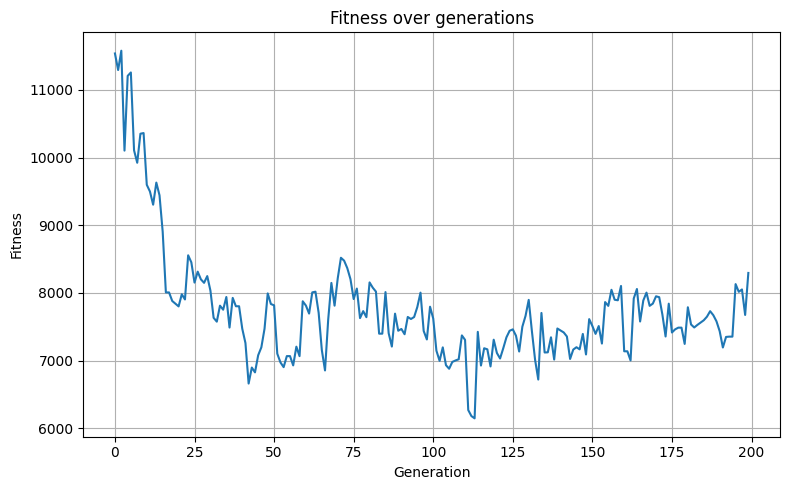


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 8, 19, 10, 9, 15, 14, 7, 13, 30, 31, 24, 27, 11, 16, 23, 37, 21, 20, 22, 28, 32, 18, 29, 38, 35, 17, 12, 25, 34, 36, 26, 33, 1]
Total dist : 7331.14 km
Time elapsed: 4.69 s


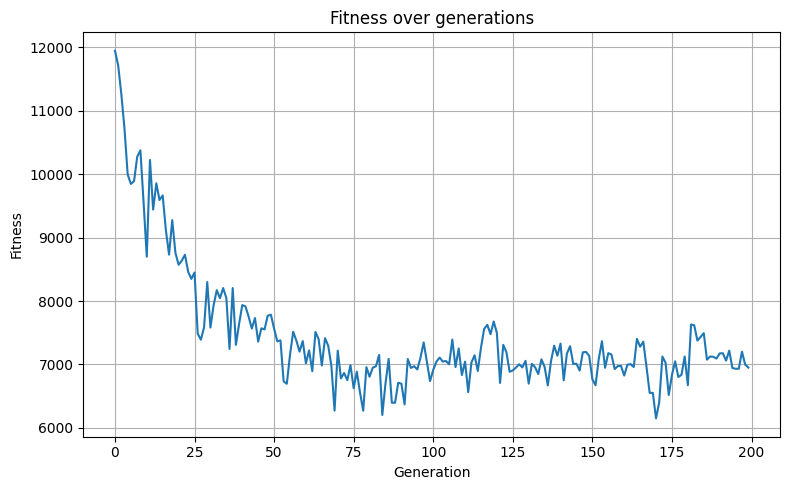


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 14, 7, 9, 8, 12, 19, 15, 31, 36, 29, 28, 25, 37, 26, 22, 20, 24, 17, 11, 30, 38, 13, 21, 10, 27, 23, 16, 18, 34, 33, 35, 32, 1]
Total dist : 7656.03 km
Time elapsed: 3.77 s


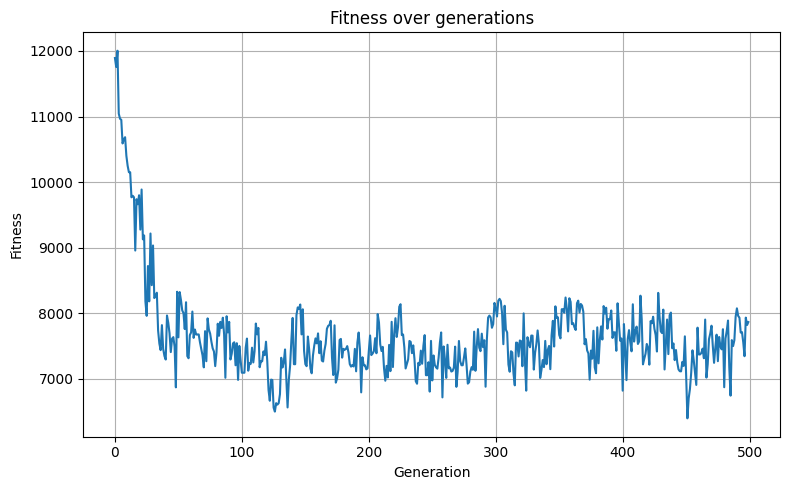


--- RESULTS for ../data/7_SouthandCentral.csv ---
Best route : [1, 2, 3, 4, 5, 6, 19, 7, 14, 15, 10, 16, 11, 12, 17, 21, 37, 23, 27, 29, 28, 35, 34, 36, 38, 31, 33, 32, 24, 8, 9, 18, 13, 20, 25, 26, 30, 22, 1]
Total dist : 4820.19 km
Time elapsed: 1.62 s


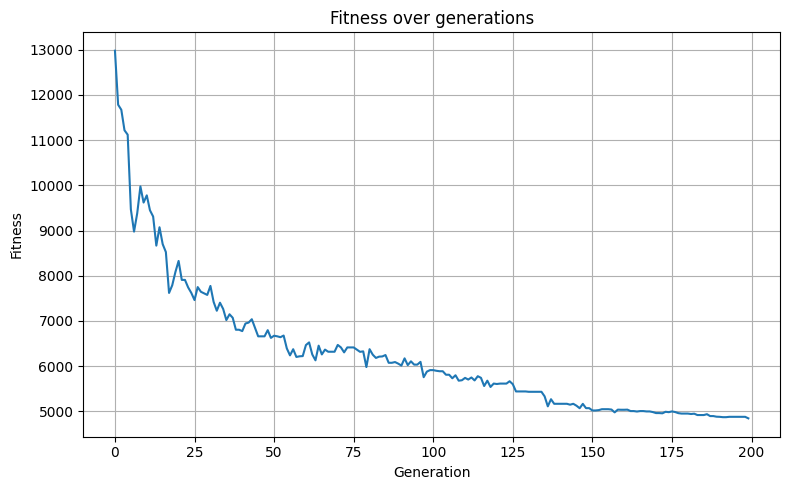

In [15]:
result13= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=200,
    generations=200,
    mutation_rate=0.05,
    selection_algorithm="elitism"
)

result14= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=500, #tăng population size
    generations=200,
    mutation_rate=0.05,
    selection_algorithm="elitism"
)

result15= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=200,
    generations=500,
    mutation_rate=0.05,
    selection_algorithm="elitism"
)

result16= analyze_ga(
    "../data/7_SouthandCentral.csv",
    population_size=200,
    generations=200,
    mutation_rate=0.01, #giảm mut
    selection_algorithm="elitism"
)

Chỉ khi thay đổi  mutation rate (giảm) mới đem lại kết quả tốt hơn đáng kể.